In [129]:
import matplotlib.pyplot as plt
import itertools as it
import functools as ft
from shapely.geometry import Polygon

# №1, 2 (обяз. часть)

In [179]:
# 1 функция визуализации последовательности полигонов, представленная в виде итератора
def draw_polygons(coords):
    for shape in coords:
        x, y = zip(*shape)
        plt.fill(x, y, color='blue')
    xy = plt.gca()
    xy.spines['left'].set_position('zero')
    xy.spines['bottom'].set_position('zero')
    xy.spines['right'].set_color('none')
    xy.spines['top'].set_color('none')
    plt.xlim((-20, 20))
    plt.ylim((-20, 20))

# 2 функции, генерирующие бесконечную последовательность не пересекающихся полигонов с различающимися координатами
def gen_rectangle(length=2, width=2, start=-25, count=100):
    x1 = it.islice(it.count(start, length), count)
    x2 = it.islice(it.count(start - 1, length), count)
    y1 = it.islice(it.repeat(width), count)
    y2 = it.islice(it.repeat(0), count)
    return (
        ((_x1, _y1), (_x2, _y1), (_x2, _y2), (_x1, _y2))
        for _x1, _x2, _y1, _y2 in zip(x1, x2, y1, y2)
    )


def gen_triangle(length=3, height=3, start=-25, count=100):
    x1 = it.islice(it.count(start, length), count)
    x2 = it.islice(it.count(start + 1, length), count)
    x3 = it.islice(it.count(start + 2, length), count)
    y1 = it.islice(it.repeat(height), count)
    y2 = it.islice(it.repeat(0), count)
    return iter([((x1_, y2_), (x2_, y1_), (x3_, y2_))
        for x1_, x2_, x3_, y1_, y2_ in zip(x1, x2, x3, y1, y2)]
    )


def gen_hexagon(length=5, height=5, start=-25, count=100):
    x1 = it.islice(it.count(start=start, step=length), count)
    x2 = it.islice(it.count(start=start + 1, step=length), count)
    x3 = it.islice(it.count(start=start + 3, step=length), count)
    x4 = it.islice(it.count(start=start + 4, step=length), count)
    y1 = it.islice(it.repeat(height), count)
    y2 = it.islice(it.repeat(0), count)
    y3 = iter([i / 2 for i in copy(y1)])
    itr = []
    for _ in range(count):
        _x1, _x2, _x3, _x4 = next(x1), next(x2), next(x3), next(x4)
        _y1, _y2, _y3 = next(y1), next(y2), next(y3)
        itr.append(list(zip((_x1, _x2, _x3, _x4, _x3, _x2), (_y3, _y1, _y1, _y3, _y2, _y2))))
    return itr

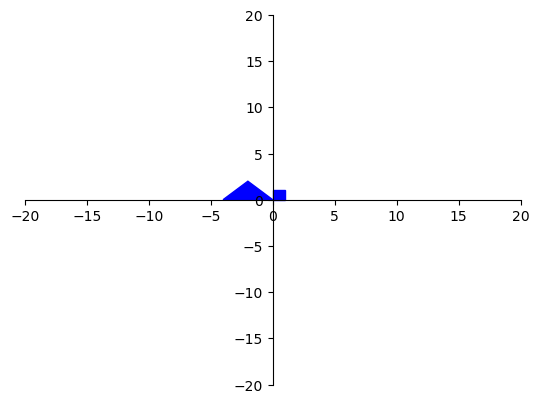

In [180]:
# вывод для №1
coord = iter((((-4, 0), (-2, 2), (0, 0)), ((0, 0), (1, 0), (1, 1), (0, 1))))
draw_polygons(coord)

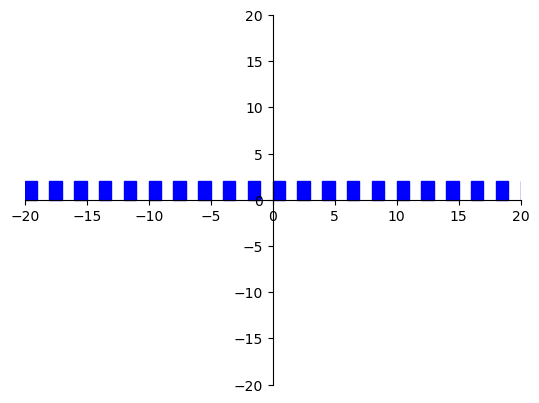

In [181]:
# вывод для №2.1
draw_polygons(gen_rectangle())

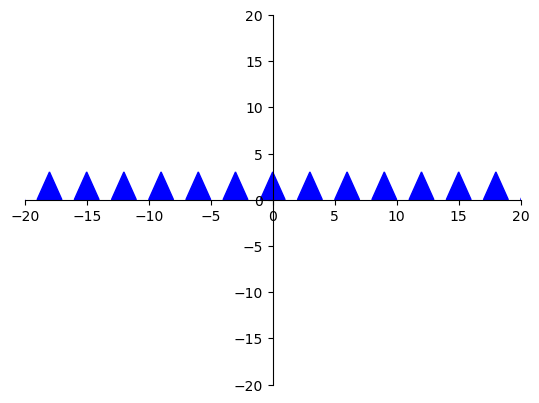

In [133]:
# вывод для №2.2
draw_polygons(gen_triangle())

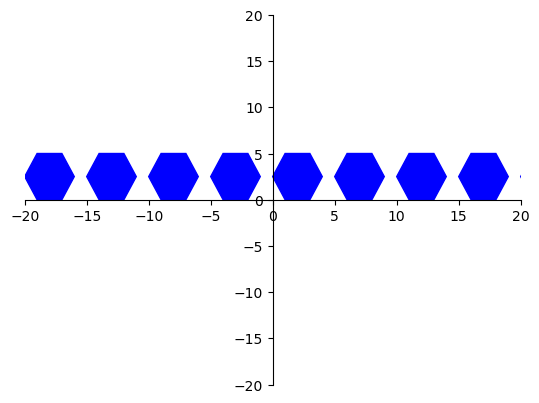

In [134]:
# вывод для №2.3
draw_polygons(gen_hexagon())

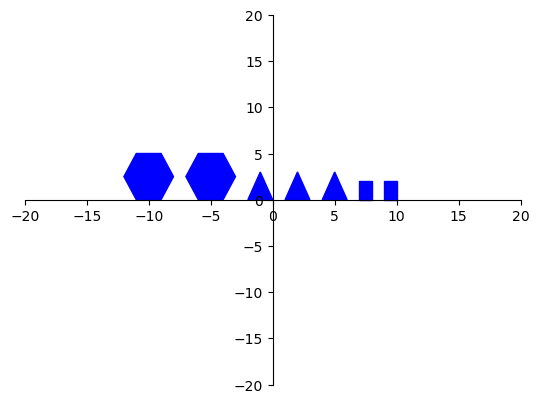

In [135]:
# вывод для №2.4
draw_polygons(gen_rectangle(start=8, count=2))
draw_polygons(gen_triangle(start=-2, count=3))
draw_polygons(gen_hexagon(start=-12, count=2))

# №3 (обяз. часть)

In [182]:
# операции параллельного переноса, поворота и симметрии
def tr_translate(coordinates, move_y=6, move_x=0):
    fig = []
    for figure in coordinates:
        x, y = zip(figure)
        y = [_y + move_y for _y in y]
        x = [_x + move_x for _x in x]
        for x, y in zip(x, y):
            fig.append((x, y))
    return fig


def tr_rotate(coordinates, angle=45):
    n = []
    for point in coordinates:
        x, y = point
        cos = m.cos(m.radians(angle))
        sin = m.sin(m.radians(angle))
        _x = x * cos - y * sin
        _y = x * sin + y * cos
        n.append((_x, _y))
    return n


def tr_symmetry(coordinates):
    n = map(ft.partial(tr_translate, move_y=-7.5), [coordinates])
    result = [i for i in map(ft.partial(tr_rotate, angle=180), n)][0]
    return result

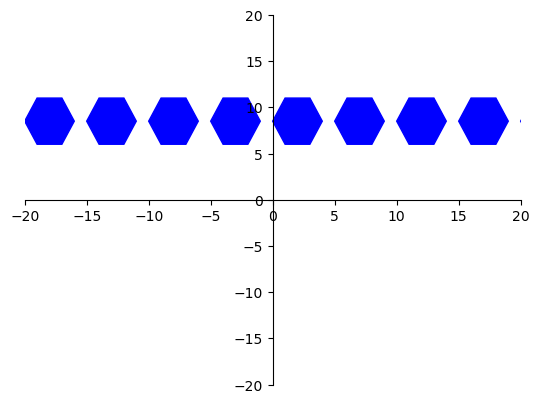

In [137]:
# вывод для №3.1
draw_polygons(map(tr_translate, gen_hexagon()))

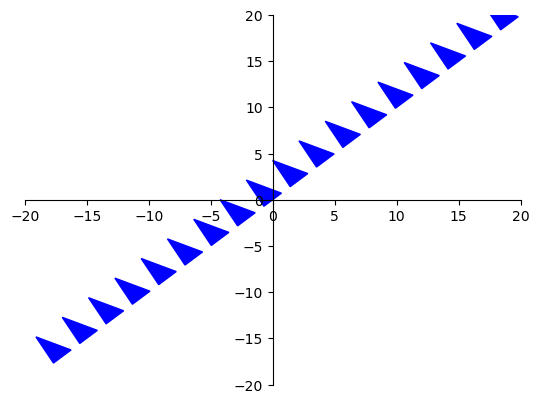

In [138]:
# вывод для №3.2
draw_polygons(map(tr_rotate, gen_triangle()))

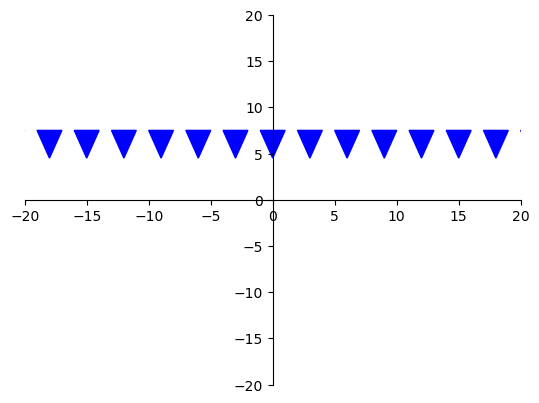

In [139]:
# вывод для №3.3
draw_polygons(map(tr_symmetry, gen_triangle()))

# №4 (обяз. часть)

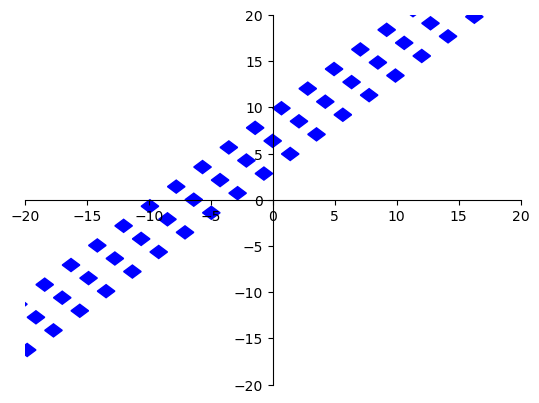

In [140]:
# вывод для 4.1
draw_polygons(map(tr_rotate, map(tr_translate, gen_rectangle(length=3, width=1))))
draw_polygons(map(tr_rotate, map(ft.partial(tr_translate, move_y=2), gen_rectangle(3, 1))))
draw_polygons(map(tr_rotate, map(ft.partial(tr_translate, move_y=4), gen_rectangle(3, 1))))

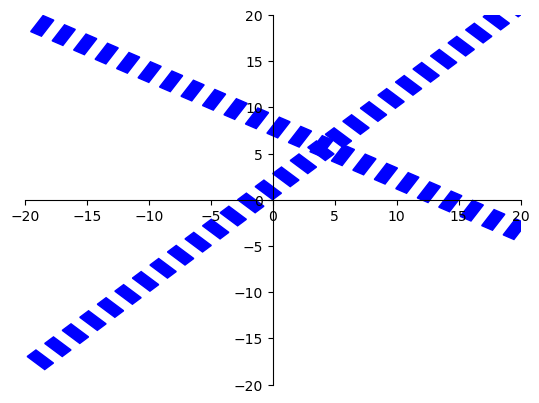

In [141]:
# вывод для 4.2
draw_polygons(map(tr_rotate, gen_rectangle()))
draw_polygons(map(ft.partial(tr_rotate, angle=-30), map(tr_translate, gen_rectangle())))

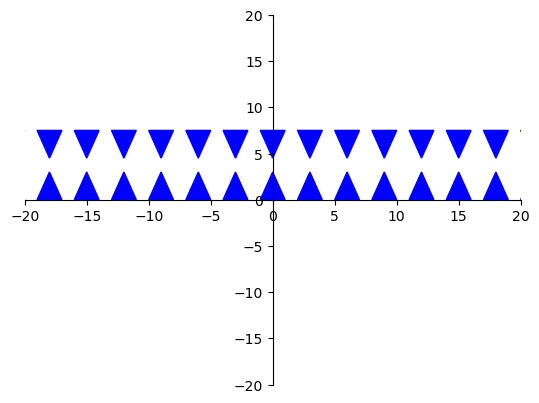

In [142]:
# вывод для 4.3
draw_polygons(gen_triangle())
draw_polygons(map(tr_symmetry, gen_triangle()))

# №5 (обяз. часть)

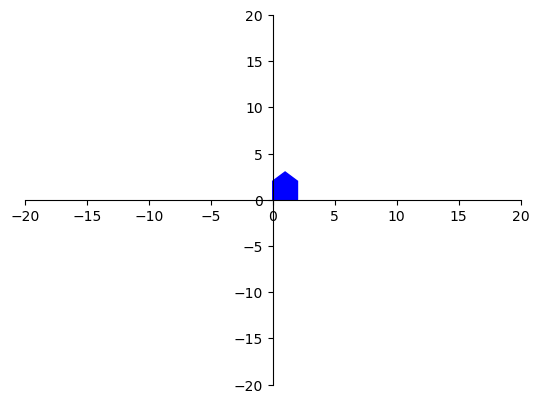

In [178]:
# вывод для 5.1
def flt_convex_polygon(coordinates):
    polygon = Polygon(coordinates)
    if polygon.convex_hull.equals(polygon):
        return True
    return False

# итератор для перебора фигур с координатами вершин первой (выпукл. многоугольник) и второй (невыпукл. многоугольник) фигур
coord = iter((((0, 0), (2, 0), (2, 2), (1, 3), (0, 2)), ((-5, 0), (-3, 0), (-4, 1), (-3, 2), (-5, 2))))
draw_polygons(filter(flt_convex_polygon, coord))

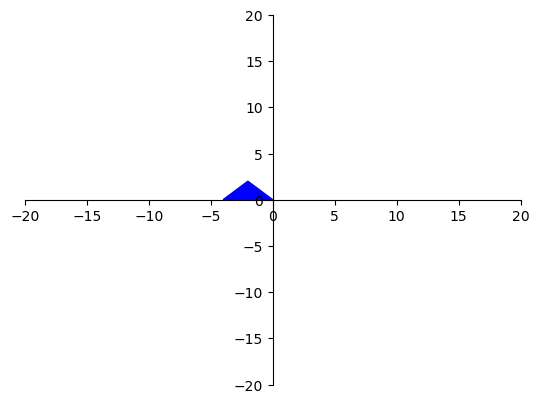

In [177]:
# вывод для 5.3
def flt_square(coordinates, area = 2):
    return True if Polygon(coordinates).area > area else False

# итератор для перебора фигур с координатами вершин первой (S > 2) и второй (S <= 2) фигур
coord = iter((((-4, 0), (-2, 2), (0, 0)), ((2, 0), (3, 0), (3, 1), (2, 1))))
draw_polygons(filter(flt_square, coord))